# Natural Language Processing 

For this project, you will be using data from GitHub repository README files. The goal will be to build a model that can predict them main programming language of a repository, given the text of the README file.

### Import Libraries

In [54]:
# Import standard python libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import base_acquire
from base_acquire import scrape_github_data
import wrangle
from wrangle import basic_clean, tokenize, stem, lemmatize, remove_stopwords, prep_article_data, clean

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Planning

# Acquire Data

In [55]:
# Acquire raw data

original_readme = scrape_github_data()
print(original_readme)

[{'repo': 'ccxt/ccxt', 'language': 'JavaScript', 'readme_contents': '# CCXT – CryptoCurrency eXchange Trading Library\n\n[![Build Status](https://travis-ci.com/ccxt/ccxt.svg?branch=master)](https://travis-ci.com/ccxt/ccxt) [![npm](https://img.shields.io/npm/v/ccxt.svg)](https://npmjs.com/package/ccxt) [![PyPI](https://img.shields.io/pypi/v/ccxt.svg)](https://pypi.python.org/pypi/ccxt) [![NPM Downloads](https://img.shields.io/npm/dy/ccxt.svg)](https://www.npmjs.com/package/ccxt) [![Discord](https://img.shields.io/discord/690203284119617602?logo=discord&logoColor=white)](https://discord.gg/ccxt) [![Supported Exchanges](https://img.shields.io/badge/exchanges-120-blue.svg)](https://github.com/ccxt/ccxt/wiki/Exchange-Markets) [![Twitter Follow](https://img.shields.io/twitter/follow/ccxt_official.svg?style=social&label=CCXT)](https://twitter.com/ccxt_official)\n\nA JavaScript / Python / PHP library for cryptocurrency trading and e-commerce with support for many bitcoin/ether/altcoin exchange

# Prepare Data

In [5]:
df= df.dropna()

In [8]:
prep_article_data(df, 'language', extra_words = [''], exclude_words = [''])


,language,language,clean,stemmed,lemmatized
0,JavaScript,JavaScript,javascript,javascript,javascript
1,C,C,c,c,c
2,JavaScript,JavaScript,javascript,javascript,javascript
3,Python,Python,python,python,python
4,JavaScript,JavaScript,javascript,javascript,javascript
...,...,...,...,...,...
144,Python,Python,python,python,python
145,Jupyter Notebook,Jupyter Notebook,jupyter notebook,jupyt notebook,jupyter notebook
146,Jupyter Notebook,Jupyter Notebook,jupyter notebook,jupyt notebook,jupyter notebook
147,Jupyter Notebook,Jupyter Notebook,jupyter notebook,jupyt notebook,jupyter notebook


#### Tokenize data

In [56]:
clean_token_readme = tokenize(original_readme)
clean_token_readme[:1000]

"[ { ' repo ' : ' ccxt/ccxt ' , ' language ' : ' JavaScript ' , ' readme_contents ' : ' # CCXT – CryptoCurrency eXchange Trading Library\\n\\n[ ! [ Build Status ] ( https://travis-ci.com/ccxt/ccxt.svg?branch=master ) ] ( https://travis-ci.com/ccxt/ccxt ) [ ! [ npm ] ( https://img.shields.io/npm/v/ccxt.svg ) ] ( https://npmjs.com/package/ccxt ) [ ! [ PyPI ] ( https://img.shields.io/pypi/v/ccxt.svg ) ] ( https://pypi.python.org/pypi/ccxt ) [ ! [ NPM Downloads ] ( https://img.shields.io/npm/dy/ccxt.svg ) ] ( https://www.npmjs.com/package/ccxt ) [ ! [ Discord ] ( https://img.shields.io/discord/690203284119617602?logo=discord&logoColor=white ) ] ( https://discord.gg/ccxt ) [ ! [ Supported Exchanges ] ( https://img.shields.io/badge/exchanges-120-blue.svg ) ] ( https://github.com/ccxt/ccxt/wiki/Exchange-Markets ) [ ! [ Twitter Follow ] ( https://img.shields.io/twitter/follow/ccxt_official.svg?style=social&label=CCXT ) ] ( https://twitter.com/ccxt_official ) \\n\\nA JavaScript / Python / PHP l

#### Stem Data

In [58]:
stemmed_clean_token_readme = stem(clean_token_readme)
stemmed_clean_token_readme[:1000]

"[ { ' repo ' : ' ccxt/ccxt ' , ' languag ' : ' javascript ' , ' readme_cont ' : ' # ccxt – cryptocurr exchang trade library\\n\\n[ ! [ build statu ] ( https://travis-ci.com/ccxt/ccxt.svg?branch=mast ) ] ( https://travis-ci.com/ccxt/ccxt ) [ ! [ npm ] ( https://img.shields.io/npm/v/ccxt.svg ) ] ( https://npmjs.com/package/ccxt ) [ ! [ pypi ] ( https://img.shields.io/pypi/v/ccxt.svg ) ] ( https://pypi.python.org/pypi/ccxt ) [ ! [ npm download ] ( https://img.shields.io/npm/dy/ccxt.svg ) ] ( https://www.npmjs.com/package/ccxt ) [ ! [ discord ] ( https://img.shields.io/discord/690203284119617602?logo=discord&logocolor=whit ) ] ( https://discord.gg/ccxt ) [ ! [ support exchang ] ( https://img.shields.io/badge/exchanges-120-blue.svg ) ] ( https://github.com/ccxt/ccxt/wiki/exchange-market ) [ ! [ twitter follow ] ( https://img.shields.io/twitter/follow/ccxt_official.svg?style=social&label=ccxt ) ] ( https://twitter.com/ccxt_offici ) \\n\\na javascript / python / php librari for cryptocurr tr

#### Basic Clean

In [59]:
cleaned_readme = basic_clean(stemmed_clean_token_readme)
cleaned_readme[:1000]

'   repo    ccxtccxt    languag    javascript    readme_cont     ccxt  cryptocurr exchang trade librarynn   build statu   httpstraviscicomccxtccxtsvgbranchmast    httpstraviscicomccxtccxt     npm   httpsimgshieldsionpmvccxtsvg    httpsnpmjscompackageccxt     pypi   httpsimgshieldsiopypivccxtsvg    httpspypipythonorgpypiccxt     npm download   httpsimgshieldsionpmdyccxtsvg    httpswwwnpmjscompackageccxt     discord   httpsimgshieldsiodiscord690203284119617602logodiscordlogocolorwhit    httpsdiscordggccxt     support exchang   httpsimgshieldsiobadgeexchanges120bluesvg    httpsgithubcomccxtccxtwikiexchangemarket     twitter follow   httpsimgshieldsiotwitterfollowccxt_officialsvgstylesociallabelccxt    httpstwittercomccxt_offici  nna javascript  python  php librari for cryptocurr trade and ecommerc with support for mani bitcoinetheraltcoin exchang market and merchant apisnn  instal   instal    usag   usag    manual   httpsdocsccxtcomenlatestmanualhtml    faq   httpsgithubcomccxtccxtwikifaq

#### Lemmatize Data

In [60]:
lemma_stemmed_clean_token_readme = lemmatize(cleaned_readme)
lemma_stemmed_clean_token_readme[:1000]

'repo ccxtccxt languag javascript readme_cont ccxt cryptocurr exchang trade librarynn build statu httpstraviscicomccxtccxtsvgbranchmast httpstraviscicomccxtccxt npm httpsimgshieldsionpmvccxtsvg httpsnpmjscompackageccxt pypi httpsimgshieldsiopypivccxtsvg httpspypipythonorgpypiccxt npm download httpsimgshieldsionpmdyccxtsvg httpswwwnpmjscompackageccxt discord httpsimgshieldsiodiscord690203284119617602logodiscordlogocolorwhit httpsdiscordggccxt support exchang httpsimgshieldsiobadgeexchanges120bluesvg httpsgithubcomccxtccxtwikiexchangemarket twitter follow httpsimgshieldsiotwitterfollowccxt_officialsvgstylesociallabelccxt httpstwittercomccxt_offici nna javascript python php librari for cryptocurr trade and ecommerc with support for mani bitcoinetheraltcoin exchang market and merchant apisnn instal instal usag usag manual httpsdocsccxtcomenlatestmanualhtml faq httpsgithubcomccxtccxtwikifaq exampl httpsgithubcomccxtccxttreemasterexampl contribut httpsgithubcomccxtccxtblobmastercontributingm

In [63]:
# Len before removing stopwords

len_before_strip_stopwords = len(lemma_stemmed_clean_token_readme)
len_before_strip_stopwords

657235

#### Remove Stopwords

In [64]:
stripped_stopwords = remove_stopwords(lemma_stemmed_clean_token_readme)
stripped_stopwords[:1000]

'repo ccxtccxt languag javascript readme_cont ccxt cryptocurr exchang trade librarynn build statu httpstraviscicomccxtccxtsvgbranchmast httpstraviscicomccxtccxt npm httpsimgshieldsionpmvccxtsvg httpsnpmjscompackageccxt pypi httpsimgshieldsiopypivccxtsvg httpspypipythonorgpypiccxt npm download httpsimgshieldsionpmdyccxtsvg httpswwwnpmjscompackageccxt discord httpsimgshieldsiodiscord690203284119617602logodiscordlogocolorwhit httpsdiscordggccxt support exchang httpsimgshieldsiobadgeexchanges120bluesvg httpsgithubcomccxtccxtwikiexchangemarket twitter follow httpsimgshieldsiotwitterfollowccxt_officialsvgstylesociallabelccxt httpstwittercomccxt_offici nna javascript python php librari cryptocurr trade ecommerc support mani bitcoinetheraltcoin exchang market merchant apisnn instal instal usag usag manual httpsdocsccxtcomenlatestmanualhtml faq httpsgithubcomccxtccxtwikifaq exampl httpsgithubcomccxtccxttreemasterexampl contribut httpsgithubcomccxtccxtblobmastercontributingmd social social ccxt 

In [66]:
# Check lengths after removing stop words

len_after_stripping_stopwords = len(stripped_stopwords)
len_stopwords = len_before_strip_stopwords - len_after_stripping_stopwords
print(f'Stripped stopwords count: {len_stopwords}')

Stripped stopwords count: 83093


In [67]:
df.head()

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."


In [71]:
# Programming Languages

df.language.unique()

array(['JavaScript', 'C', 'Python', 'C++', 'Swift', 'Java', 'C#', 'PHP',
       'Go', 'TypeScript', 'Assembly', 'Mathematica', 'HTML', 'CSS',
       'Shell', 'Kotlin', 'G-code', 'Ruby', 'R', 'Jupyter Notebook', None,
       'MATLAB', 'TeX', 'Matlab', 'Groff', 'Objective-C'], dtype=object)

### Get Json File

In [78]:
# read json file named data
df = pd.read_json("data.json", orient = None)
df

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
144,neurodata/brainlit,Python,# Brainlit\n[![DOI](https://zenodo.org/badge/2...
145,patrickmineault/xcorr-notebooks,Jupyter Notebook,# xcorr-notebooks\nAn ongoing collection of ip...
146,ITNG/ModelingNeuralDynamics,Jupyter Notebook,# ModelingNeuralDynamics\nAn Introduction to M...
147,CNS-OIST/a310_cns_2018,Jupyter Notebook,# A310 Computational Neuroscience - Okinawa In...


In [81]:
# Check for nulls

df.language.isna().sum()

9

In [85]:
# Fill null with zero
df = df.fillna(0)
df.head()

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."


In [87]:
# Check nulls 

df.language.isna().any()

False

### Clean df


In [111]:
df['clean_content'] = df.readme_contents.apply(clean).apply(' '.join)

df

,repo,language,readme_contents,clean_content
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
144,neurodata/brainlit,Python,# Brainlit\n[![DOI](https://zenodo.org/badge/2...,brainlit doihttpszenodoorgbadge237507496svghtt...
145,patrickmineault/xcorr-notebooks,Jupyter Notebook,# xcorr-notebooks\nAn ongoing collection of ip...,xcorrnotebooks ongoing collection ipython note...
146,ITNG/ModelingNeuralDynamics,Jupyter Notebook,# ModelingNeuralDynamics\nAn Introduction to M...,modelingneuraldynamics introduction modeling n...
147,CNS-OIST/a310_cns_2018,Jupyter Notebook,# A310 Computational Neuroscience - Okinawa In...,a310 computational neuroscience okinawa instit...


In [115]:
# Lower case all df
df = df.apply(lambda col: col.str.lower())
df.head()

,repo,language,readme_contents,clean_content
0,ccxt/ccxt,javascript,# ccxt – cryptocurrency exchange trading libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,c,engines\n=======\n\ndeprecation note\n--------...,engine deprecation note engine api introduced ...
2,hellozeronet/zeronet,javascript,# zeronet [![build status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,javascript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             149 non-null    object
 1   language         140 non-null    object
 2   readme_contents  149 non-null    object
 3   clean_content    149 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB


In [117]:
df.describe()

,repo,language,readme_contents,clean_content
count,149,140,149,149
unique,104,24,104,104
top,translationalneuromodeling/tapas,javascript,"![tapas logo](misc/tapaslogo.png?raw=true ""tap...",tapa logomisctapaslogopngrawtrue tapa logo ver...
freq,2,31,2,2


# Explore

- What are the most common words in READMEs?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?
- Are there any words that uniquely identify a programming language?

In [118]:
# Most common language

df.language.value_counts()

javascript          31
python              30
jupyter notebook    18
c++                  7
java                 6
html                 6
matlab               4
c                    4
shell                4
ruby                 4
go                   3
tex                  3
kotlin               2
typescript           2
assembly             2
mathematica          2
css                  2
groff                2
g-code               2
r                    2
c#                   1
swift                1
php                  1
objective-c          1
Name: language, dtype: int64

Text(0.5, 1.0, 'Programming Language Distribution')

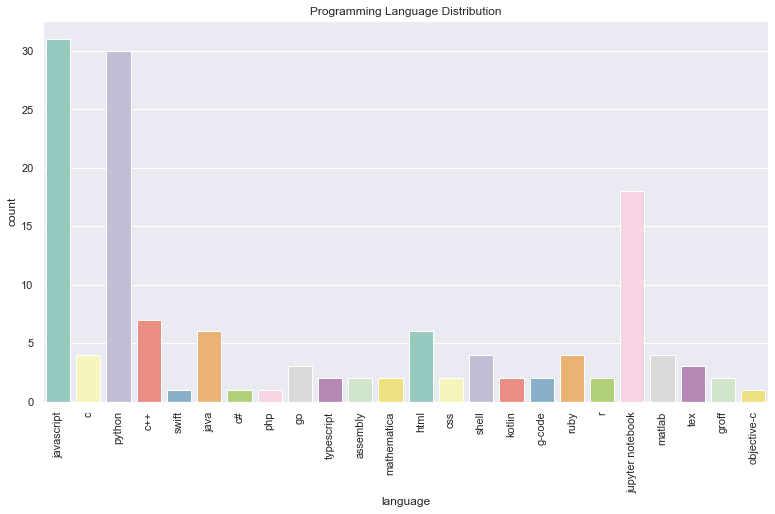

In [119]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="language", data=df, palette="Set3")
ax.tick_params(axis='x', rotation=90)
ax.set_title("Programming Language Distribution")

In [120]:
# Top 10 languages

df.language.value_counts().head(10)

javascript          31
python              30
jupyter notebook    18
c++                  7
java                 6
html                 6
matlab               4
c                    4
shell                4
ruby                 4
Name: language, dtype: int64

In [121]:
# Lest 10 popular languages
df.language.value_counts().tail(10)

assembly       2
mathematica    2
css            2
groff          2
g-code         2
r              2
c#             1
swift          1
php            1
objective-c    1
Name: language, dtype: int64

## Q1 What are the most common words in READMEs?


In [122]:
df.columns

Index(['repo', 'language', 'readme_contents', 'clean_content'], dtype='object')

In [123]:
df.language.unique()

array(['javascript', 'c', 'python', 'c++', 'swift', 'java', 'c#', 'php',
       'go', 'typescript', 'assembly', 'mathematica', 'html', 'css',
       'shell', 'kotlin', 'g-code', 'ruby', 'r', 'jupyter notebook', nan,
       'matlab', 'tex', 'groff', 'objective-c'], dtype=object)

In [132]:
javascript_words = clean(' '.join(df[df.language == 'javascript'].clean_content))
c_words = clean(' '.join(df[df.language == 'c'].clean_content))
python_words = clean(' '.join(df[df.language == 'python'].clean_content))
c_plus_plus_words = clean(' '.join(df[df.language == 'c++'].clean_content))
swift_words = clean(' '.join(df[df.language == 'swift'].clean_content))
java_words = clean(' '.join(df[df.language == 'java'].clean_content))
c_sharp_words = clean(' '.join(df[df.language == 'c#'].clean_content))
go_words = clean(' '.join(df[df.language == 'go'].clean_content))
typescript_words = clean(' '.join(df[df.language == 'typescript'].clean_content))
mathematica_words = clean(' '.join(df[df.language == 'mathematica'].clean_content))
html_words = clean(' '.join(df[df.language == 'javascript'].clean_content))
css_words = clean(' '.join(df[df.language == 'css'].clean_content))
shell_words = clean(' '.join(df[df.language == 'shell'].clean_content))
kotlin_words = clean(' '.join(df[df.language == 'kotlin'].clean_content))
g_code_words = clean(' '.join(df[df.language == 'g-code'].clean_content))
ruby_words = clean(' '.join(df[df.language == 'ruby'].clean_content))
r_words = clean(' '.join(df[df.language == 'r'].clean_content))
jn_words = clean(' '.join(df[df.language == 'jupyter notebook'].clean_content))
matlab_words = clean(' '.join(df[df.language == 'matlab'].clean_content))
tex_words = clean(' '.join(df[df.language == 'tex'].clean_content))
groff_words = clean(' '.join(df[df.language == 'groff'].clean_content))
objective_c_words = clean(' '.join(df[df.language == 'objective-c'].clean_content))

all_words = clean(' '.join(df.clean_content))


## Word Frequencies

In [146]:
javascript_frequency = pd.Series(javascript_words).value_counts()


In [160]:
# splitting the entire sub-corpus of total words in a class type by spaces,
# turning the list output by split into a Series, then getting that value_counts()
javascript_frequency = pd.Series(javascript_words).value_counts()
c_frequency = pd.Series(c_words).value_counts()
python_frequency = pd.Series(python_words).value_counts()
c_plus_plus_frequency = pd.Series(c_plus_plus_words).value_counts()
swift_frequency = pd.Series(swift_words).value_counts()
java_frequency = pd.Series(java_words).value_counts()
c_sharp_frequency = pd.Series(c_sharp_words).value_counts()

go_frequency = pd.Series(go_words).value_counts()
typescript_frequency = pd.Series(typescript_words).value_counts()
mathematica_frequency = pd.Series(mathematica_words).value_counts()
html_frequency = pd.Series(html_words).value_counts()
css_frequency = pd.Series(css_words).value_counts()

shell_frequency = pd.Series(shell_words).value_counts()
kotlin_frequency = pd.Series(kotlin_words).value_counts()
g_code_frequency = pd.Series(g_code_words).value_counts()
ruby_frequency = pd.Series(ruby_words).value_counts()
r_frequency = pd.Series(r_words).value_counts()
jn_frequency = pd.Series(jn_words).value_counts()
matlab_frequency = pd.Series(matlab_words).value_counts()
tex_frequency = pd.Series(tex_words).value_counts()
groff_frequency = pd.Series(groff_words).value_counts()
objective_c_frequency = pd.Series(objective_c_words).value_counts()

all_words = pd.Series(all_words).value_counts()

In [162]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([all_words, javascript_frequency, c_frequency, python_frequency, c_plus_plus_frequency,\
                         swift_frequency,java_frequency,c_sharp_frequency,\
                       go_frequency,typescript_frequency,mathematica_frequency,html_frequency,\
                         css_frequency,shell_frequency,kotlin_frequency,g_code_frequency,ruby_frequency,\
                       r_frequency,jn_frequency,matlab_frequency,tex_frequency,groff_frequency,\
                         objective_c_frequency], axis=1).fillna(0).astype(int)


word_counts.columns = ['all_words','javascrip', 'python', 'c_plus_plus', 'c_plus','swift','java','c_sharp',\
                       'go','typescript','mathematica','html','css','shell','kotlin','g_code','ruby',\
                       'r','jupyter_nb','matlab','tex','groff','objective_c']

In [163]:
word_counts.head(10)

,all_words,javascrip,python,c_plus_plus,c_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
data,678,82,15,99,14,25,10,3,1,4,...,12,6,4,87,34,33,6,0,2,1
use,475,98,37,83,30,18,12,1,15,13,...,2,0,6,22,0,15,24,2,0,6
version,444,185,15,29,15,16,11,0,48,12,...,36,0,0,15,0,5,22,0,2,5
using,399,86,28,58,10,3,7,0,19,14,...,4,4,2,12,18,17,8,1,0,3
project,339,75,5,72,12,7,7,0,8,3,...,12,0,0,8,0,28,0,0,0,18
model,339,0,2,121,0,0,7,0,30,12,...,0,0,0,7,0,38,4,0,0,0
run,314,119,18,48,16,2,5,0,15,34,...,4,0,0,13,0,16,2,0,2,9
code,313,61,36,47,29,5,6,3,6,6,...,2,0,0,15,0,20,10,2,2,1
1,307,69,7,49,3,2,4,1,0,0,...,0,0,6,1,22,13,6,1,0,8
api,303,180,18,35,0,0,19,1,0,8,...,0,0,0,21,0,0,0,0,0,1
